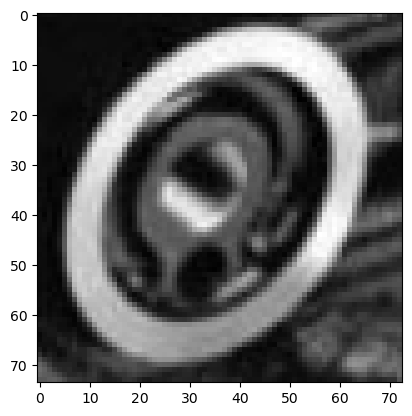

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
imagen = plt.imread('/Users/maximilianofanara/Downloads/train/1.jpg')

# Convertir la imagen a escala de grises
imagen_gris = np.mean(imagen, axis=2)

# Mostrar la imagen en escala de grises
plt.imshow(imagen_gris, cmap='gray')
plt.show()


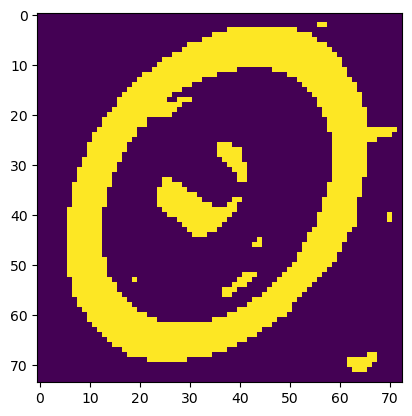

In [6]:
def convertir_a_binario(imagen):
    # Normalizar la imagen a valores entre 0 y 1
    imagen_normalizada = imagen / 255

    # Binarizar la imagen
    umbral = 0.5
    return (imagen_normalizada > umbral).astype(int)

# Mostrar la imagen binarizada
imagen_binaria = convertir_a_binario(imagen_gris)
plt.imshow(imagen_binaria)
plt.show()


In [8]:
# Definir la matriz de pesos
W = np.zeros((imagen_binaria.shape[0], imagen_binaria.shape[1]))

# Conectar cada píxel con sus vecinos de 8 bits
for i in range(imagen_binaria.shape[0]):
    for j in range(imagen_binaria.shape[1]):
        for di in [-1, 0, 1]:
            for dj in [-1, 0, 1]:
                if di == 0 and dj == 0:
                    continue
                ni = i + di
                nj = j + dj
                if ni >= 0 and ni < imagen_binaria.shape[0] and nj >= 0 and nj < imagen_binaria.shape[1]:
                    W[i, j] += (imagen_binaria[ni, nj] - imagen_binaria[i, j])

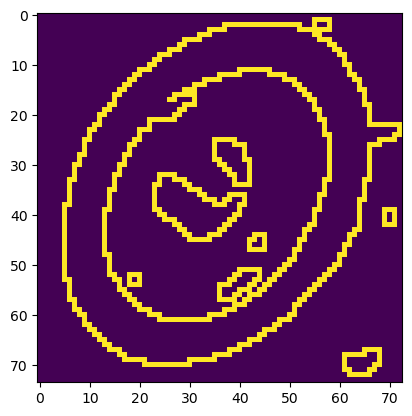

In [10]:
# Definir el estado inicial
estado_inicial = imagen_binaria.copy()

# Iterar hasta que el estado se estabilice
while True:
    estado_actual = estado_inicial.copy()

    # Actualizar cada píxel
    for i in range(imagen_binaria.shape[0]):
        for j in range(imagen_binaria.shape[1]):
            suma = 0
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni = i + di
                    nj = j + dj
                    if ni >= 0 and ni < imagen_binaria.shape[0] and nj >= 0 and nj < imagen_binaria.shape[1]:
                        suma += W[i, j] * estado_actual[ni, nj]

            if suma > 0:
                estado_actual[i, j] = 1
            else:
                estado_actual[i, j] = 0

    # Verificar si el estado se ha estabilizado
    if np.array_equal(estado_actual, estado_inicial):
        break

    # Actualizar el estado inicial
    estado_inicial = estado_actual

# Mostrar el estado final
plt.imshow(estado_actual)
plt.show()
